In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
pd.set_option('display.max_rows', 145)

In [2]:
# Import charging output file from SUMO
df_output = pd.read_csv('charging_output.csv', delimiter=";")
df_output

C:\Users\joey_\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,step,charging_station,status,EV,watt_charged,current_battery,max_battery
0,0,hh1_ev1_homecs,not charging,NaN,NaN,NaN,NaN
1,0,hh1_ev3_homecs,not charging,NaN,NaN,NaN,NaN
2,0,hh1_ev4_homecs,not charging,NaN,NaN,NaN,NaN
3,0,hh1_ev5_homecs,not charging,NaN,NaN,NaN,NaN
4,0,hh1_ev7_homecs,not charging,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
202850,86400,hh16_ev132_public,not charging,NaN,NaN,NaN,NaN
202851,86400,hh16_ev133_public,not charging,NaN,NaN,NaN,NaN
202852,86400,hh16_ev134_public,not charging,NaN,NaN,NaN,NaN
202853,86400,hh16_ev135_public,not charging,NaN,NaN,NaN,NaN


## Home

In [3]:
# The same processa as in profile_home
df = df_output
df_home = df.loc[df['charging_station'].str.contains("homecs")]

df_home2 = df.loc[df['status'] == "charging"]
df_home2 = df_home2.loc[df_home2['charging_station'].str.contains("homecs")]
df_home2

df_home3 = df.loc[df['status'] == "not charging"]
df_home3 = df_home3.loc[df_home3['charging_station'].str.contains("homecs")]

df_home3 = df_home3.groupby(['step']).size().reset_index(name="count")
df_home2 = df_home2.groupby(['step']).size().reset_index(name="count")
df_home = df_home.groupby(['step']).size().reset_index(name="count")
df_home["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_home['charging'] = df_home['count'] - df_home3['count']
df_home['charging'] = df_home['charging'] * 7
df_home

,step,count,charging
0,06:00,340,0
1,06:10,340,0
2,06:20,340,0
3,06:30,340,0
4,06:40,340,0
5,06:50,340,0
6,07:00,340,0
7,07:10,340,0
8,07:20,340,0
9,07:30,340,0


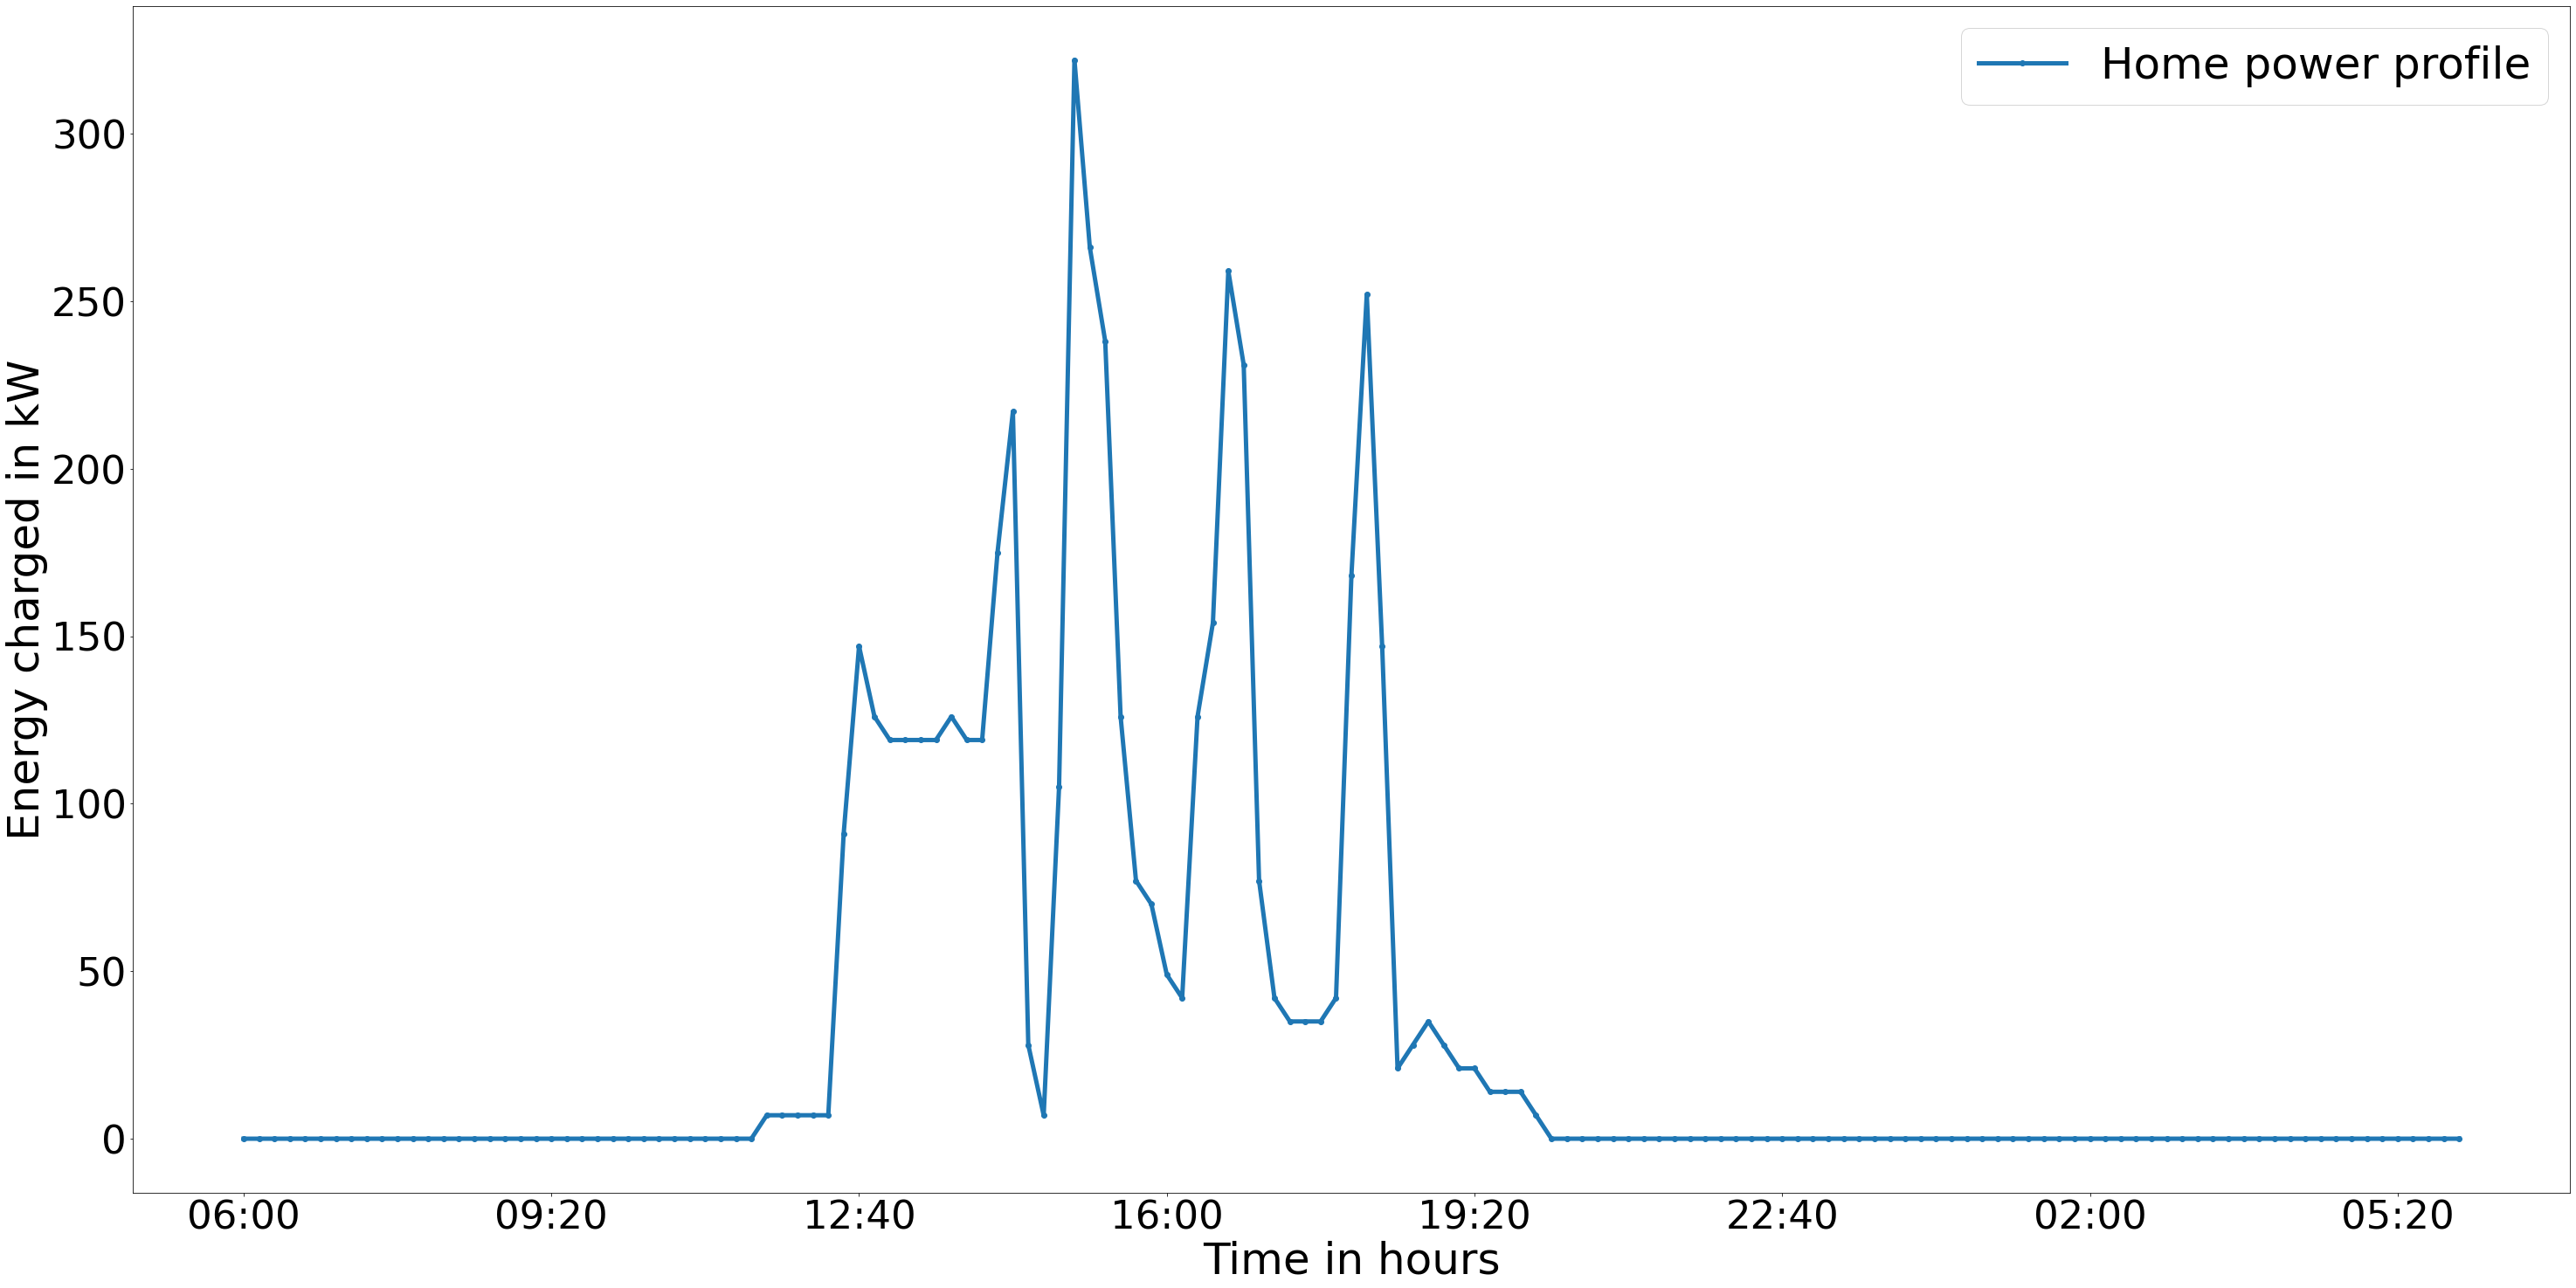

In [4]:
df_home.plot(x ='step', y='charging', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(['Home power profile'], fontsize=50)
plt.xlabel('Time in hours', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
plt.show()

## Work

In [5]:
# The same process as in profile_work
df = df_output
df_work = df.loc[df['charging_station'].str.contains("work")]
df_work2 = df.loc[df['status'] == "charging"]
df_work2 = df_work2.loc[df_work2['charging_station'].str.contains("work")]
df_work3 = df.loc[df['status'] == "not charging"]
df_work3 = df_work3.loc[df_work3['charging_station'].str.contains("work")]
df_work3 = df_work3.groupby(['step']).size().reset_index(name="count")
df_work2 = df_work2.groupby(['step']).size().reset_index(name="count")
df_work = df_work.groupby(['step']).size().reset_index(name="count")
df_work["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_work['charging'] = df_work['count'] - df_work3['count']
df_work['charging'] = df_work['charging'] * 7

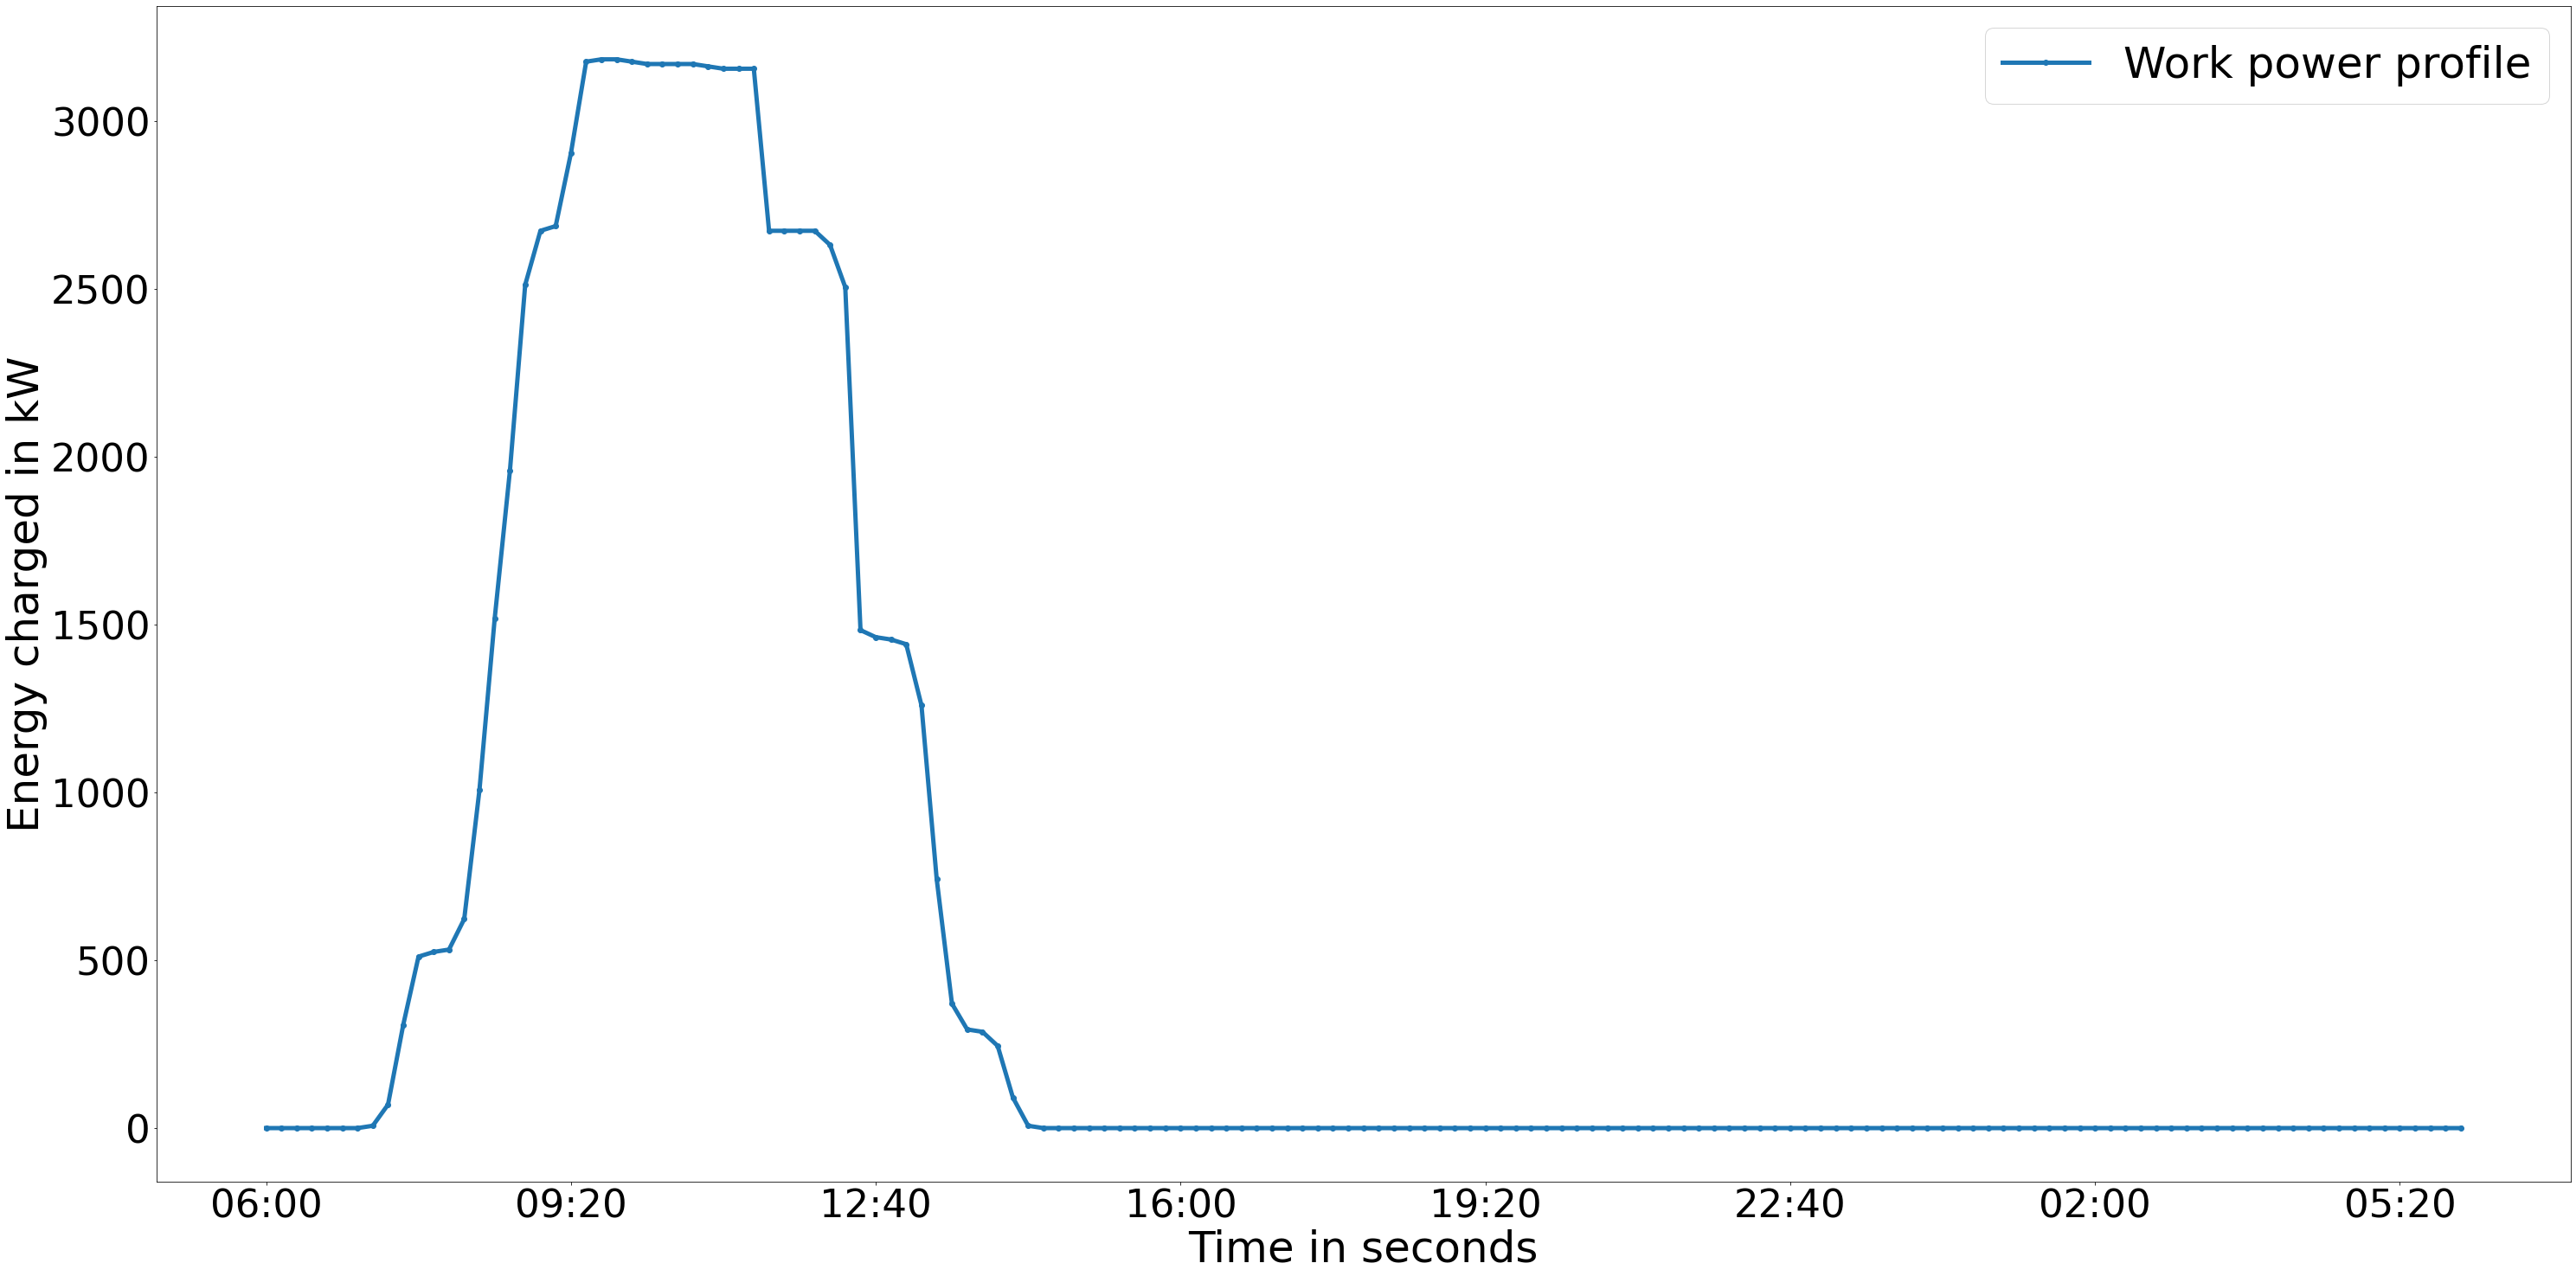

In [6]:
df_work.plot(x ='step', y='charging', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(['Work power profile'], fontsize=50)
plt.xlabel('Time in seconds', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
plt.show()

## Public

In [7]:
# The same process as in profile_public
df = df_output
df_public = df.loc[df['charging_station'].str.contains("public")]
df_public2 = df.loc[df['status'] == "charging"]
df_public2 = df_public2.loc[df_public2['charging_station'].str.contains("public")]
df_public3 = df.loc[df['status'] == "not charging"]
df_public3 = df_public3.loc[df_public3['charging_station'].str.contains("public")]
df_public3 = df_public3.groupby(['step']).size().reset_index(name="count")
df_public2 = df_public2.groupby(['step']).size().reset_index(name="count")
df_public = df_public.groupby(['step']).size().reset_index(name="count")
df_public["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_public['charging'] = df_public['count'] - df_public3['count']
df_public['charging'] = df_public['charging'] * 22

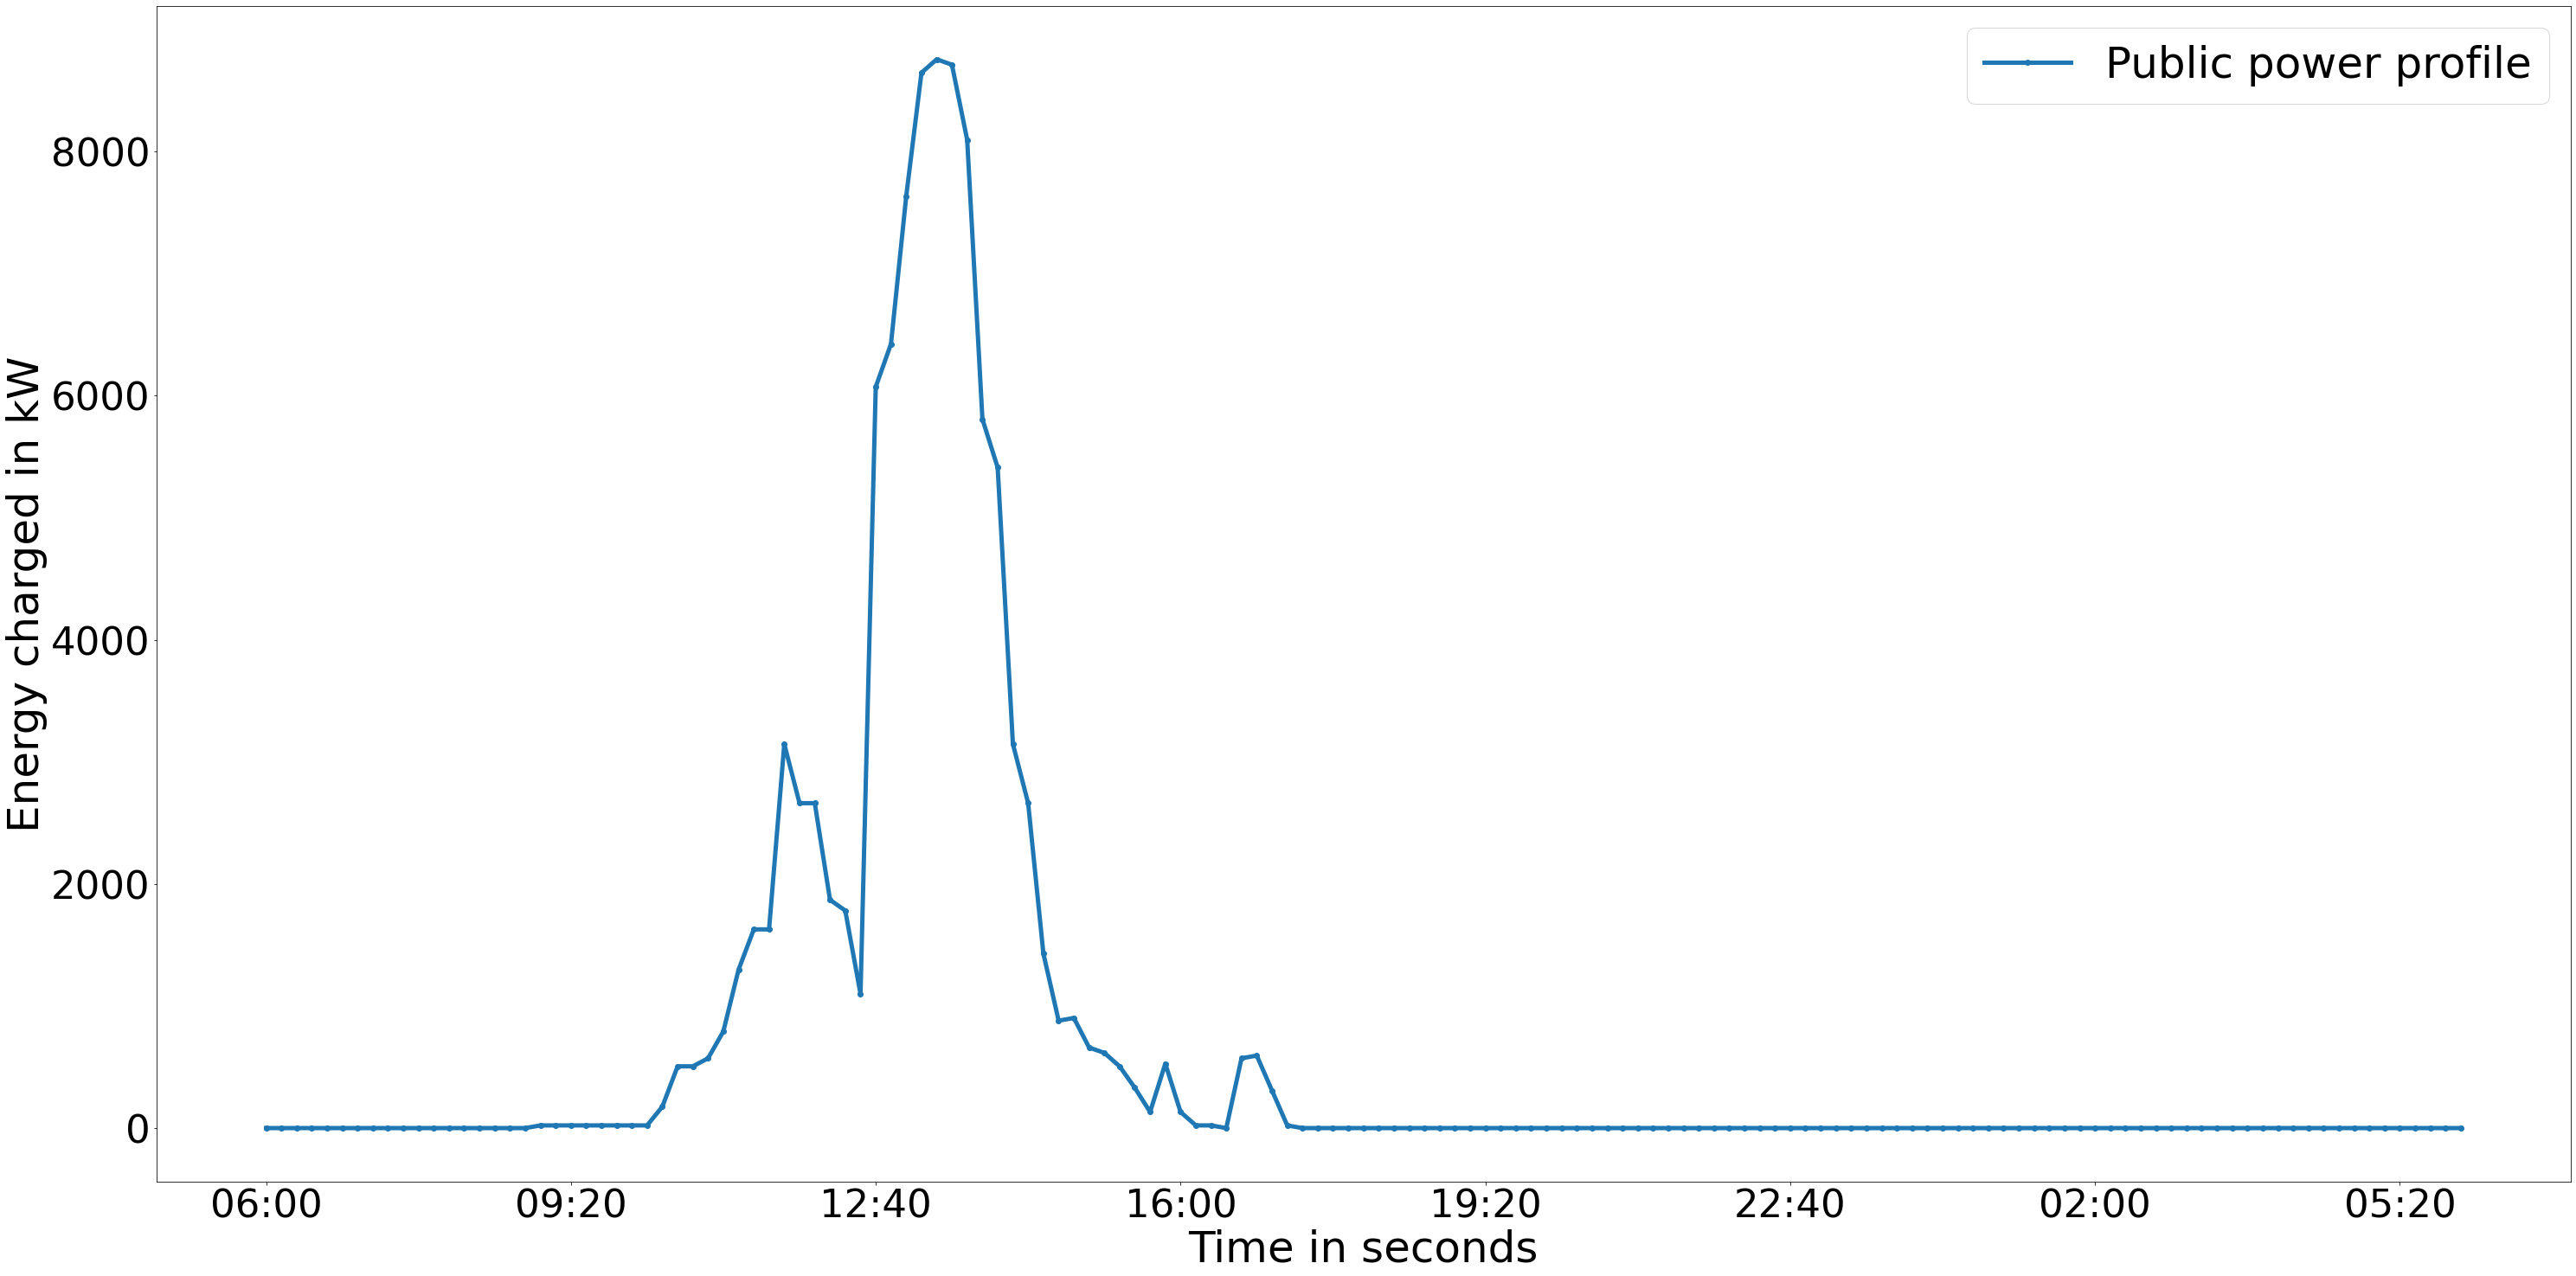

In [8]:
df_public.plot(x ='step', y='charging', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(['Public power profile'], fontsize=50)
plt.xlabel('Time in seconds', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
plt.show()

## Scenario 1 power profiles

In [9]:
# Import scenario 2 charging output file from SUMO
df_outputsc1 = pd.read_csv('charging_scenario2_new.csv', delimiter=";")
df_outputsc1

C:\Users\joey_\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,step,charging_station,status,ev,watt_charged,current_battery,maximum_battery
0,0,hh1_ev1_homecs,not charging,NaN,NaN,NaN,NaN
1,0,hh1_ev3_homecs,not charging,NaN,NaN,NaN,NaN
2,0,hh1_ev4_homecs,not charging,NaN,NaN,NaN,NaN
3,0,hh1_ev5_homecs,not charging,NaN,NaN,NaN,NaN
4,0,hh1_ev7_homecs,not charging,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
158748,86400,hh16_ev132_public,not charging,NaN,NaN,NaN,NaN
158749,86400,hh16_ev133_public,not charging,NaN,NaN,NaN,NaN
158750,86400,hh16_ev134_public,not charging,NaN,NaN,NaN,NaN
158751,86400,hh16_ev135_public,not charging,NaN,NaN,NaN,NaN


In [10]:
# The same process as above for home, work, and public, but with scenario 2
df = df_outputsc1
df_homesc1 = df.loc[df['charging_station'].str.contains("homecs")]

df_home2sc1 = df.loc[df['status'] == "charging"]
df_home2sc1 = df_home2sc1.loc[df_home2sc1['charging_station'].str.contains("homecs")]
df_home2sc1

df_home3sc1 = df.loc[df['status'] == "not charging"]
df_home3sc1 = df_home3sc1.loc[df_home3sc1['charging_station'].str.contains("homecs")]

df_home3sc1 = df_home3sc1.groupby(['step']).size().reset_index(name="count")
df_home2sc1 = df_home2sc1.groupby(['step']).size().reset_index(name="count")
df_homesc1 = df_homesc1.groupby(['step']).size().reset_index(name="count")
df_homesc1["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_homesc1['homecs_scenario2'] = df_homesc1['count'] - df_home3sc1['count']
df_homesc1['homecs_scenario2'] = df_homesc1['homecs_scenario2'] * 7
df_homesc1 = df_homesc1.drop(df_homesc1.columns[[1]], axis=1)
df_homesc1

,step,homecs_scenario2
0,06:00,0
1,06:10,0
2,06:20,0
3,06:30,0
4,06:40,0
5,06:50,0
6,07:00,0
7,07:10,0
8,07:20,0
9,07:30,0


In [11]:
df = df_outputsc1
df_worksc1 = df.loc[df['charging_station'].str.contains("work")]
df_work2sc1 = df.loc[df['status'] == "charging"]
df_work2sc1 = df_work2sc1.loc[df_work2sc1['charging_station'].str.contains("work")]
df_work3sc1 = df.loc[df['status'] == "not charging"]
df_work3sc1 = df_work3sc1.loc[df_work3sc1['charging_station'].str.contains("work")]
df_work3sc1 = df_work3sc1.groupby(['step']).size().reset_index(name="count")
df_work2sc1 = df_work2sc1.groupby(['step']).size().reset_index(name="count")
df_worksc1 = df_worksc1.groupby(['step']).size().reset_index(name="count")
df_worksc1["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_worksc1['work_scenario2'] = df_worksc1['count'] - df_work3sc1['count']
df_worksc1['work_scenario2'] = df_worksc1['work_scenario2'] * 7
df_worksc1 = df_worksc1.drop(df_worksc1.columns[[1]], axis=1)
df_worksc1

,step,work_scenario2
0,06:00,0
1,06:10,0
2,06:20,0
3,06:30,0
4,06:40,0
5,06:50,0
6,07:00,0
7,07:10,7
8,07:20,21
9,07:30,56


In [12]:
df = df_outputsc1
df_publicsc1 = df.loc[df['charging_station'].str.contains("public")]
df_public2sc1 = df.loc[df['status'] == "charging"]
df_public2sc1 = df_public2sc1.loc[df_public2sc1['charging_station'].str.contains("public")]
df_public3sc1 = df.loc[df['status'] == "not charging"]
df_public3sc1 = df_public3sc1.loc[df_public3sc1['charging_station'].str.contains("public")]
df_public3sc1 = df_public3sc1.groupby(['step']).size().reset_index(name="count")
df_public2sc1 = df_public2sc1.groupby(['step']).size().reset_index(name="count")
df_publicsc1 = df_publicsc1.groupby(['step']).size().reset_index(name="count")
df_publicsc1["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_publicsc1['public_scenario2'] = df_publicsc1['count'] - df_public3sc1['count']
df_publicsc1['public_scenario2'] = df_publicsc1['public_scenario2'] * 22
df_publicsc1 = df_publicsc1.drop(df_publicsc1.columns[[1]], axis=1)
df_publicsc1

,step,public_scenario2
0,06:00,0
1,06:10,0
2,06:20,0
3,06:30,0
4,06:40,0
5,06:50,0
6,07:00,0
7,07:10,0
8,07:20,0
9,07:30,0


In [13]:
df_allsc1 = pd.concat([df_homesc1, df_worksc1, df_publicsc1])
df_allsc1 = df_allsc1.sort_values('step')
df_allsc1 = df_allsc1.fillna(0)
df_allsc1 = df_allsc1.groupby('step').sum()
df_allsc1

,homecs_scenario2,work_scenario2,public_scenario2
step,,,
00:00,0.0,0.0,0.0
00:10,0.0,0.0,0.0
00:20,0.0,0.0,0.0
00:30,0.0,0.0,0.0
00:40,0.0,0.0,0.0
00:50,0.0,0.0,0.0
01:00,0.0,0.0,0.0
01:10,0.0,0.0,0.0
01:20,0.0,0.0,0.0


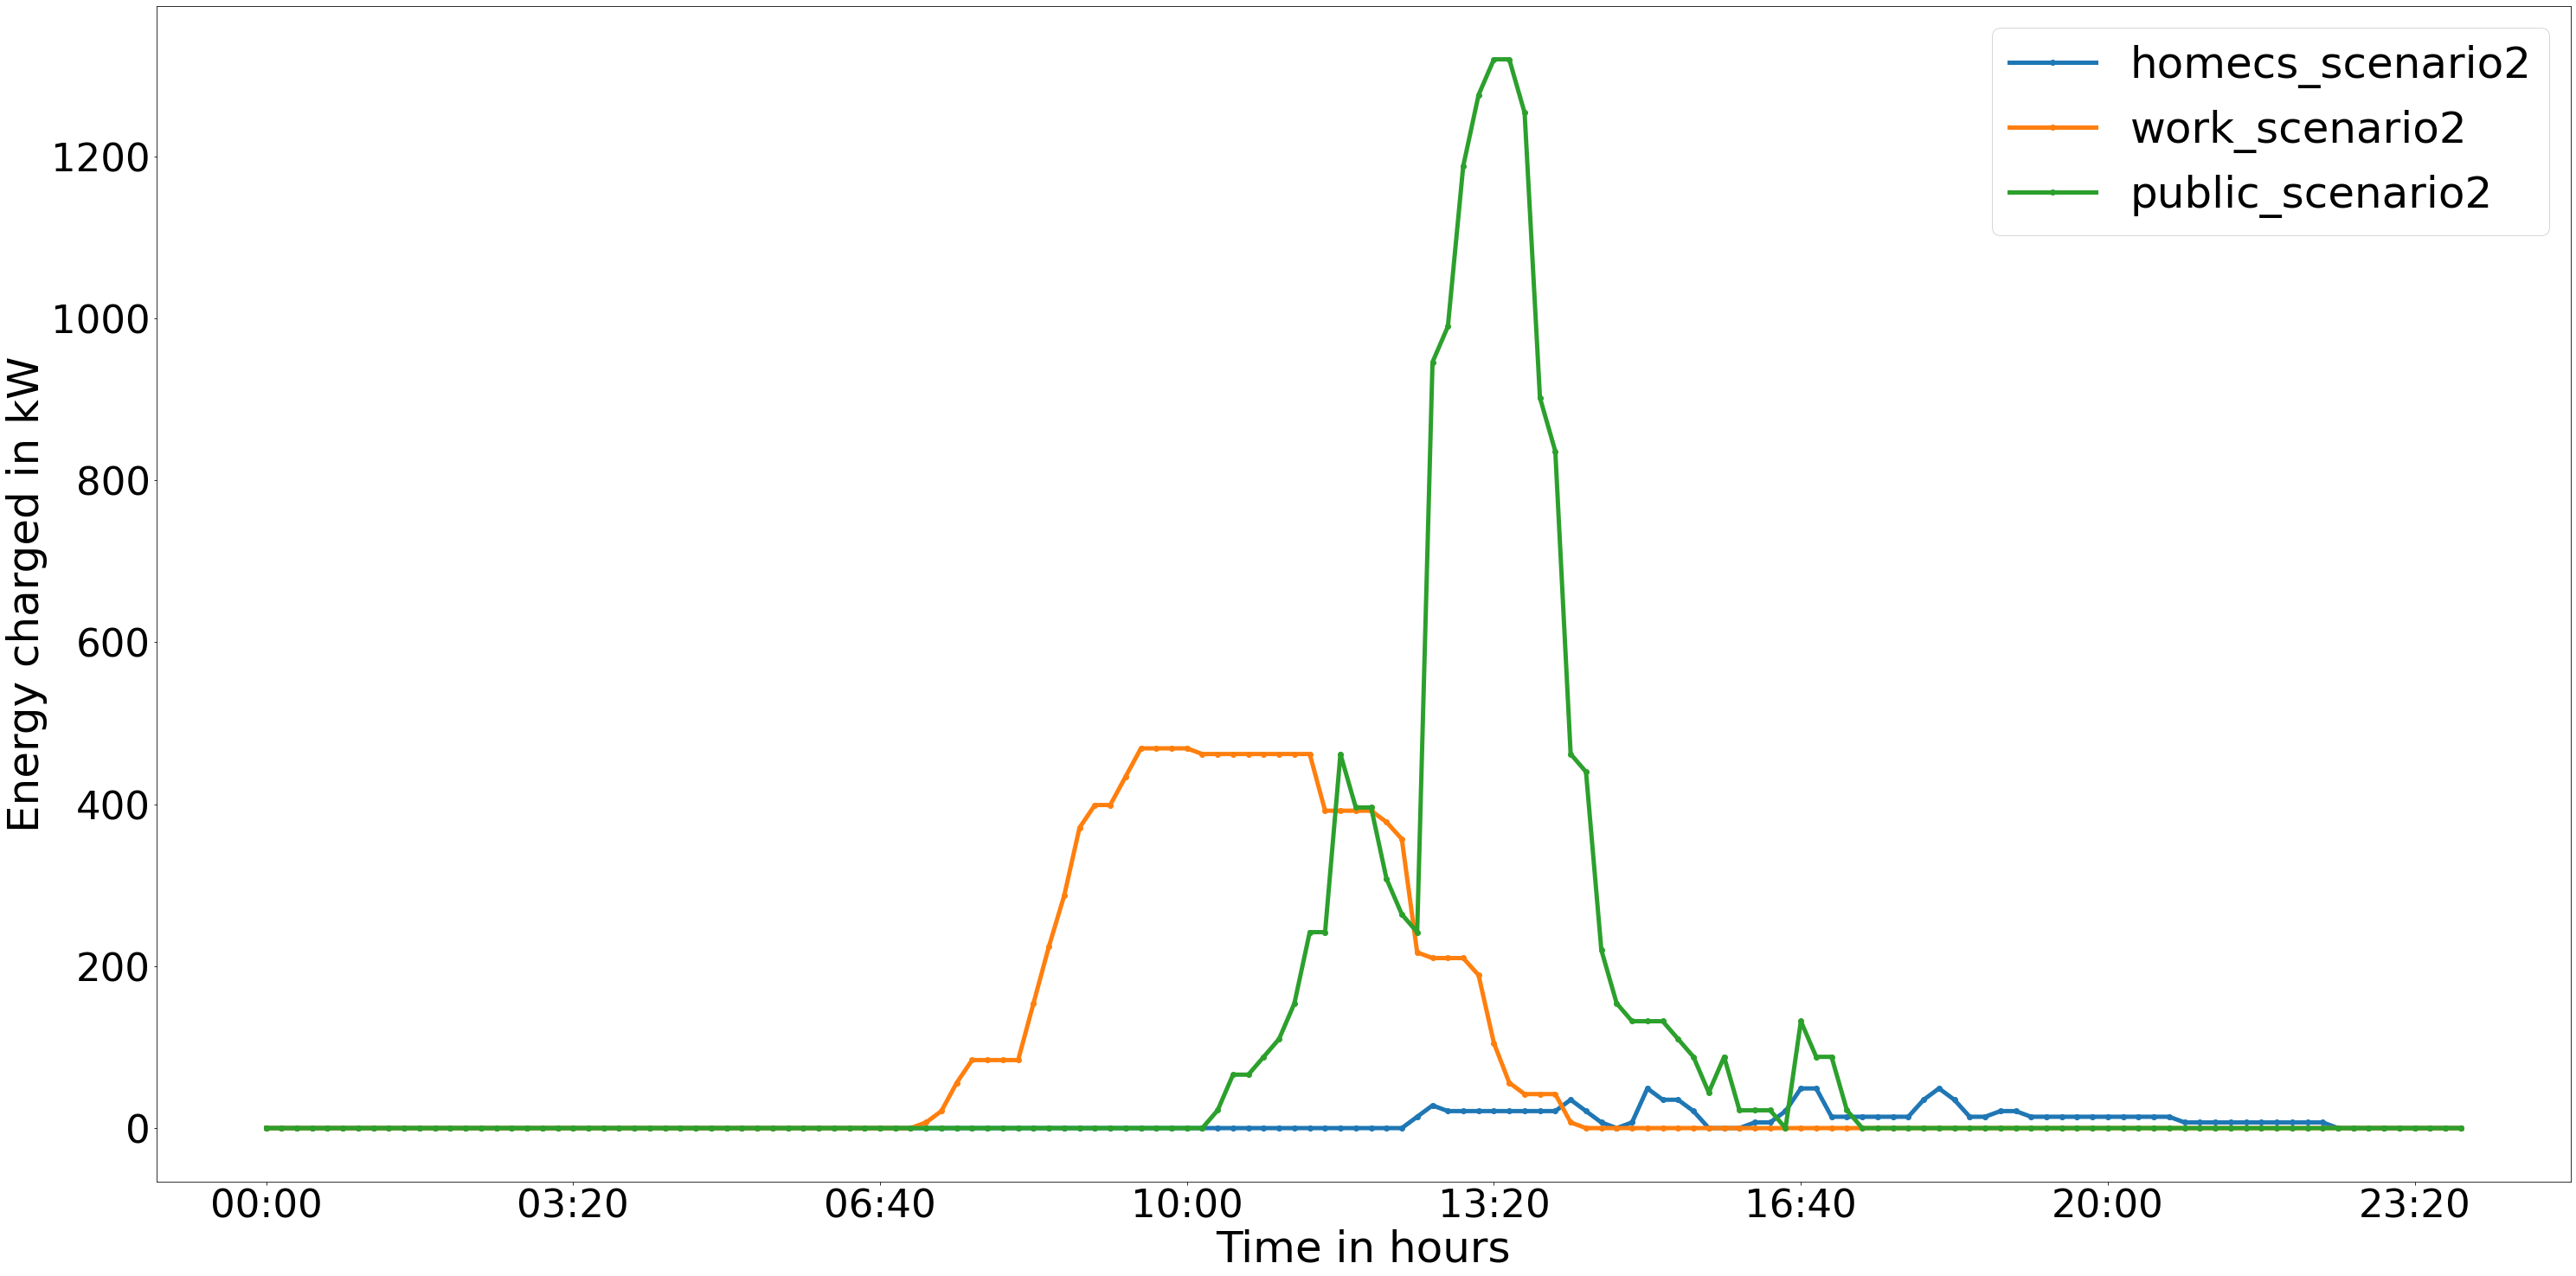

In [14]:
# Plot power profiles of scenario 2
df_allsc1.plot(kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(fontsize=50)
plt.xlabel('Time in hours', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
#plt.axhline(y=86.67, color='r', linestyle='-')
plt.show()

## Individual power profiles of scenario 2 for comparison

In [23]:
# For home
df_h2 = df_h
df_h2['homecs'] = df_h2['charging']
df_h2 = df_h2.drop(df_h2.columns[[1]], axis=1)
df_h2["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_h2

,step,homecs
0,06:00,0
1,06:10,0
2,06:20,0
3,06:30,0
4,06:40,0
5,06:50,0
6,07:00,0
7,07:10,0
8,07:20,0
9,07:30,0


In [24]:
# For work
df_w2 = df_w
df_w2['work'] = df_w2['charging']
df_w2 = df_w2.drop(df_w2.columns[[1]], axis=1)
df_w2["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_w2

,step,work
0,06:00,0
1,06:10,0
2,06:20,0
3,06:30,0
4,06:40,0
5,06:50,0
6,07:00,0
7,07:10,7
8,07:20,70
9,07:30,308


In [25]:
# For public
df_p2 = df_p
df_p2['public'] = df_p2['charging']
df_p2 = df_p2.drop(df_p2.columns[[1,]], axis=1)
df_p2["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]

In [27]:
# Comparison of baseline scenario and scenario 2 for home
df_comp1 = pd.concat([df_h2, df_homesc1])
df_comp1 = df_comp1.sort_values('step')
df_comp1 = df_comp1.fillna(0)
df_comp1 = df_comp1.groupby('step').sum()
df_comp1

,homecs,homecs_scenario2
step,,
00:00,0.0,0.0
00:10,0.0,0.0
00:20,0.0,0.0
00:30,0.0,0.0
00:40,0.0,0.0
00:50,0.0,0.0
01:00,0.0,0.0
01:10,0.0,0.0
01:20,0.0,0.0


In [28]:
# Comparison of baseline scenario and scenario 2 for work
df_comp2 = pd.concat([df_w2, df_worksc1])
df_comp2 = df_comp2.sort_values('step')
df_comp2 = df_comp2.fillna(0)
df_comp2 = df_comp2.groupby('step').sum()
df_comp2

,work,work_scenario2
step,,
00:00,0.0,0.0
00:10,0.0,0.0
00:20,0.0,0.0
00:30,0.0,0.0
00:40,0.0,0.0
00:50,0.0,0.0
01:00,0.0,0.0
01:10,0.0,0.0
01:20,0.0,0.0


In [29]:
# Comparison of baseline scenario and scenario 2 for public
df_comp3 = pd.concat([df_p2, df_publicsc1])
df_comp3 = df_comp3.sort_values('step')
df_comp3 = df_comp3.fillna(0)
df_comp3 = df_comp3.groupby('step').sum()
df_comp3

,public,public_scenario2
step,,
00:00,0.0,0.0
00:10,0.0,0.0
00:20,0.0,0.0
00:30,0.0,0.0
00:40,0.0,0.0
00:50,0.0,0.0
01:00,0.0,0.0
01:10,0.0,0.0
01:20,0.0,0.0


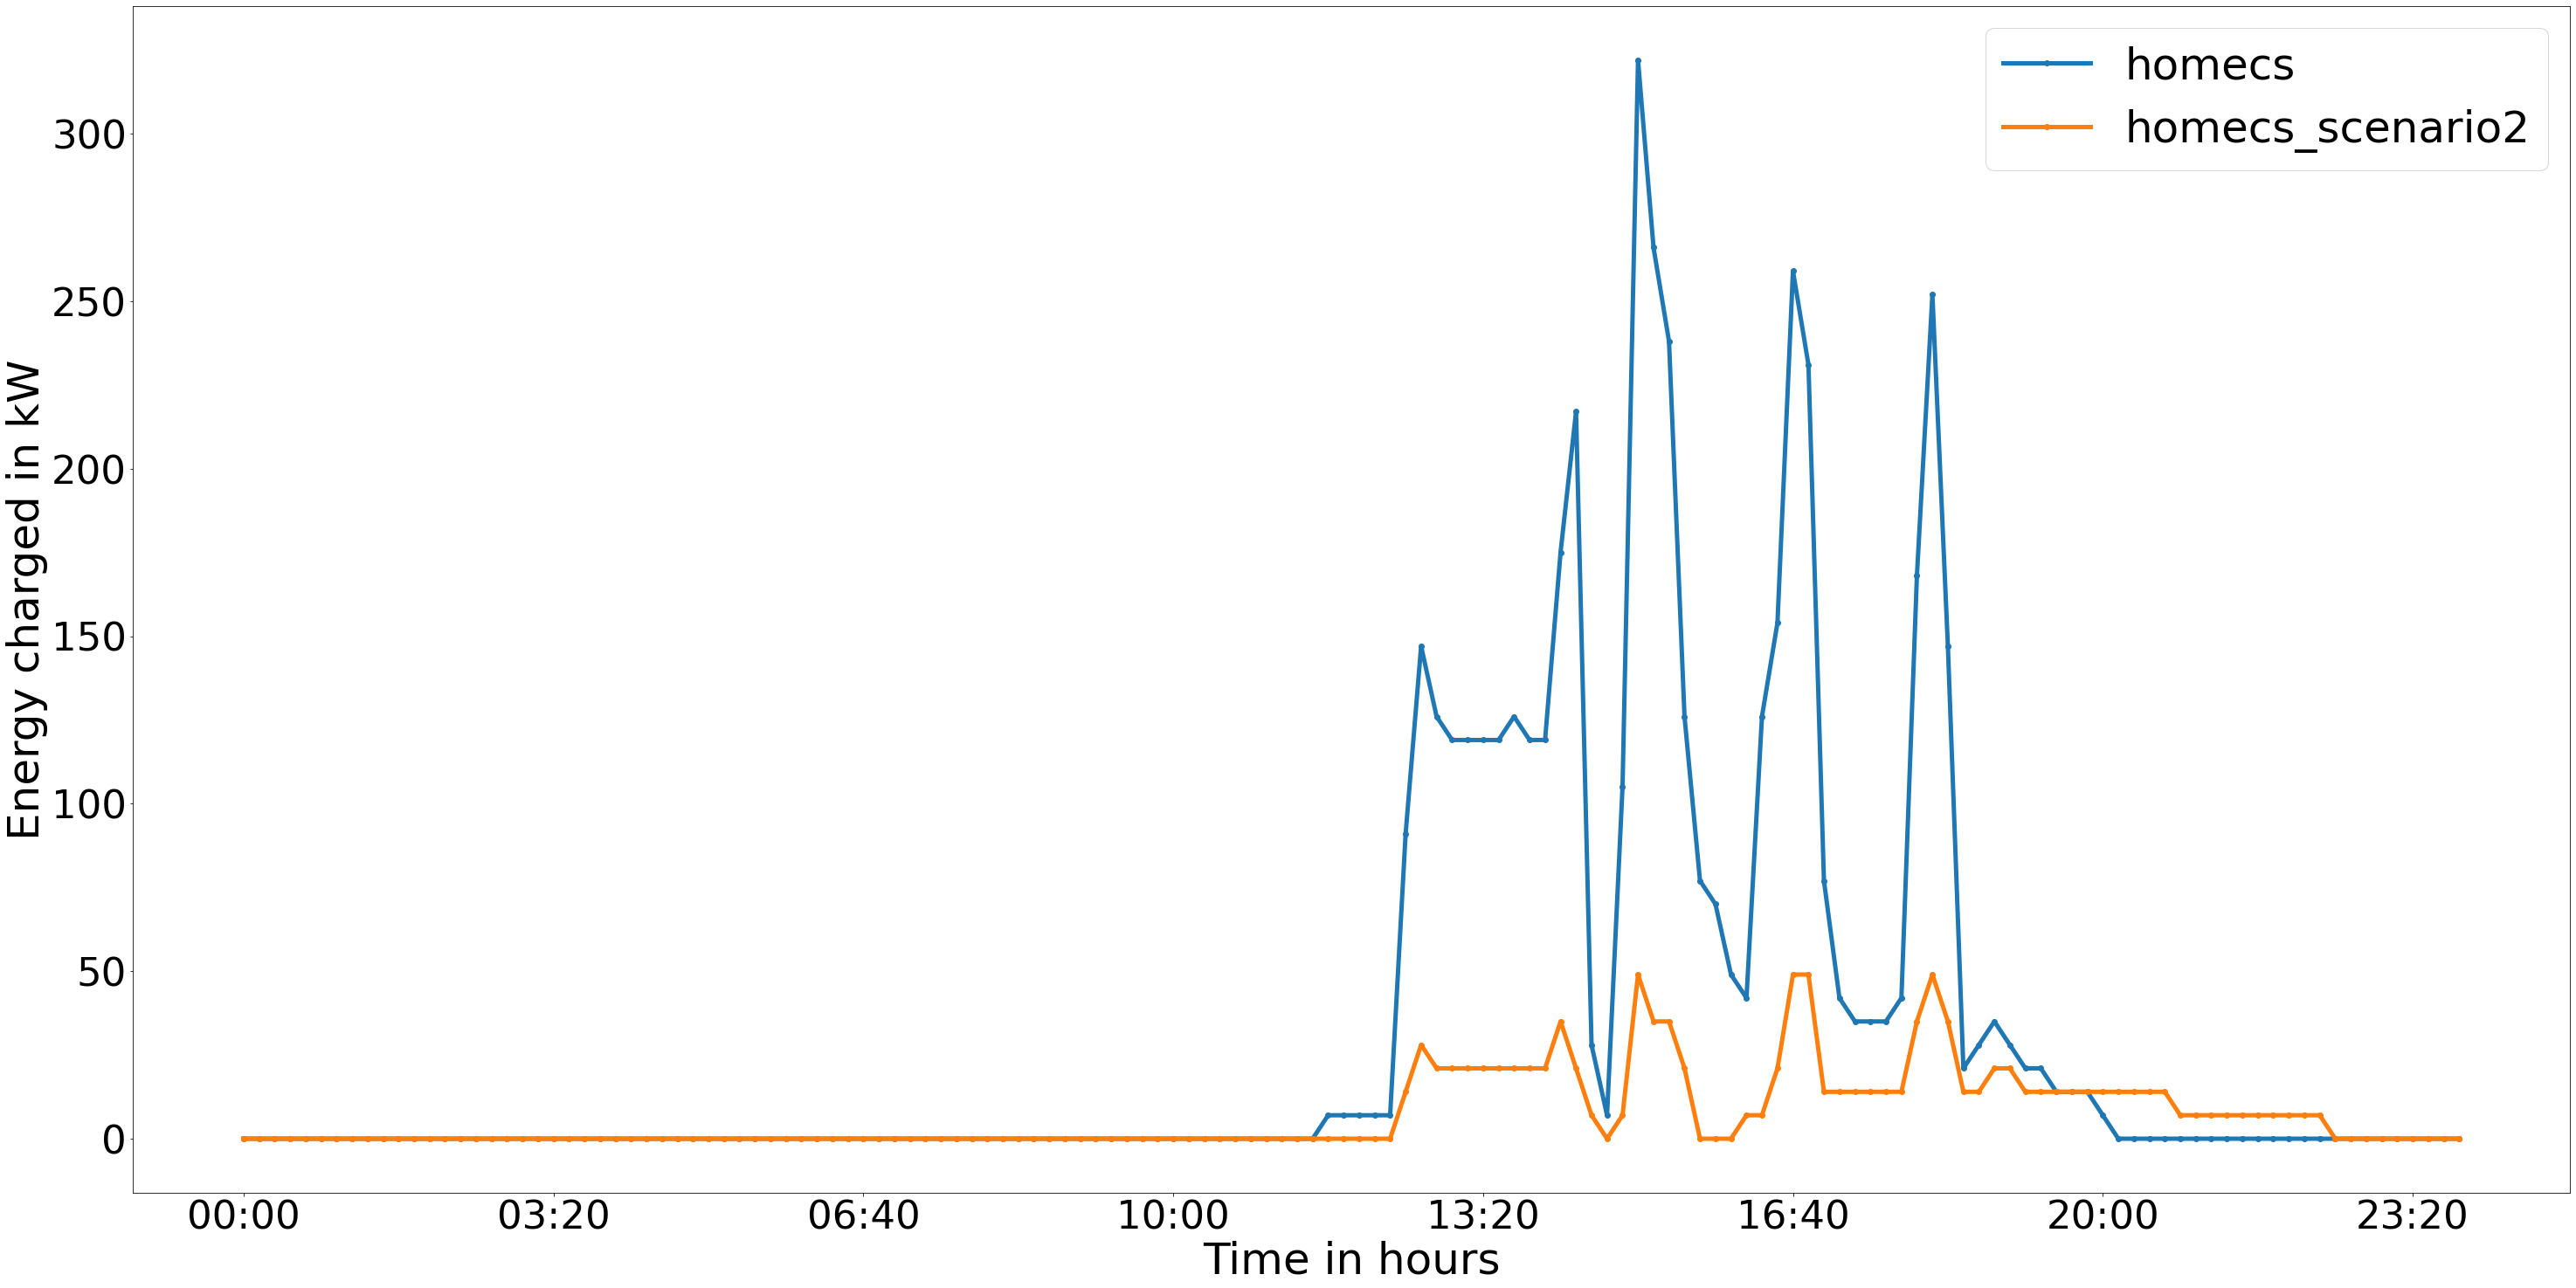

In [30]:
# Plot power profiles of comparison of baseline scenario and scenario 2 home
df_comp1.plot(kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(fontsize=50)
plt.xlabel('Time in hours', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
#plt.axhline(y=86.67, color='r', linestyle='-')
plt.show()

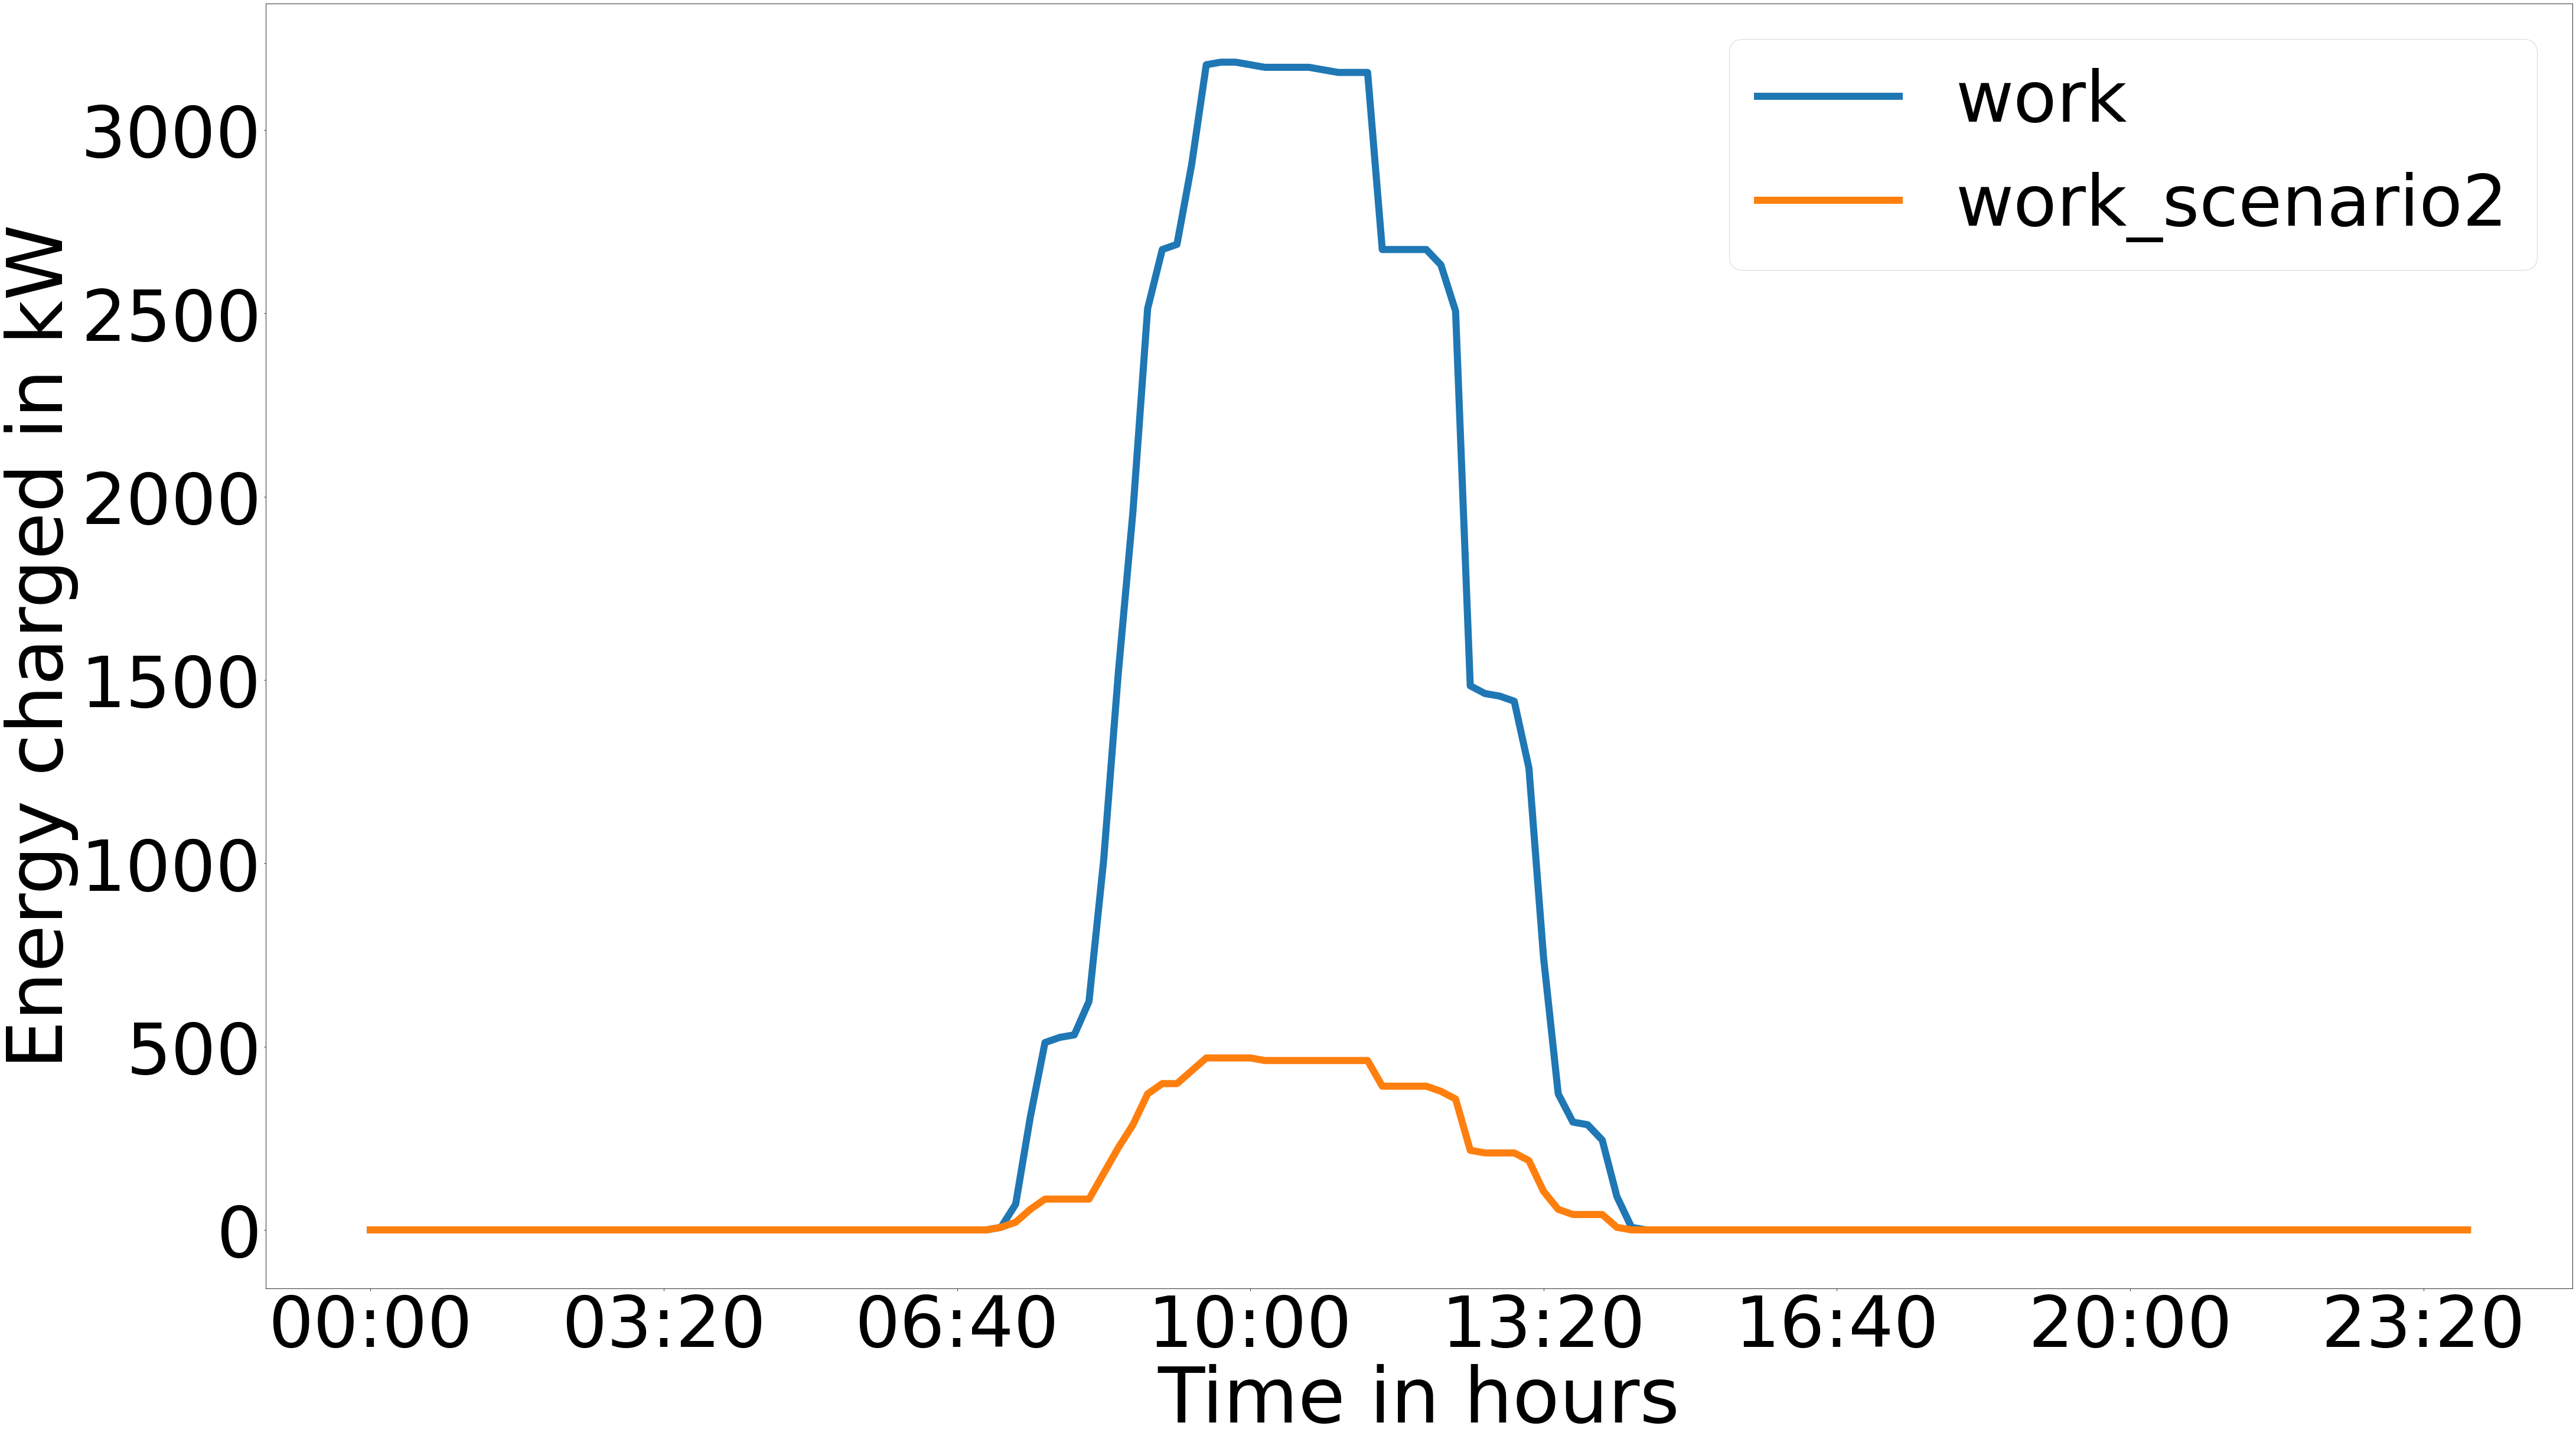

In [31]:
# Plot power profiles of comparison of baseline scenario and scenario 2 work
df_comp2.plot(kind = 'line', lw = 12, figsize=(70,40), fontsize=120, style='o-')
plt.legend(fontsize=120)
plt.xlabel('Time in hours', fontsize=130)
plt.ylabel('Energy charged in kW', fontsize=130)
#plt.axhline(y=86.67, color='r', linestyle='-')
plt.show()

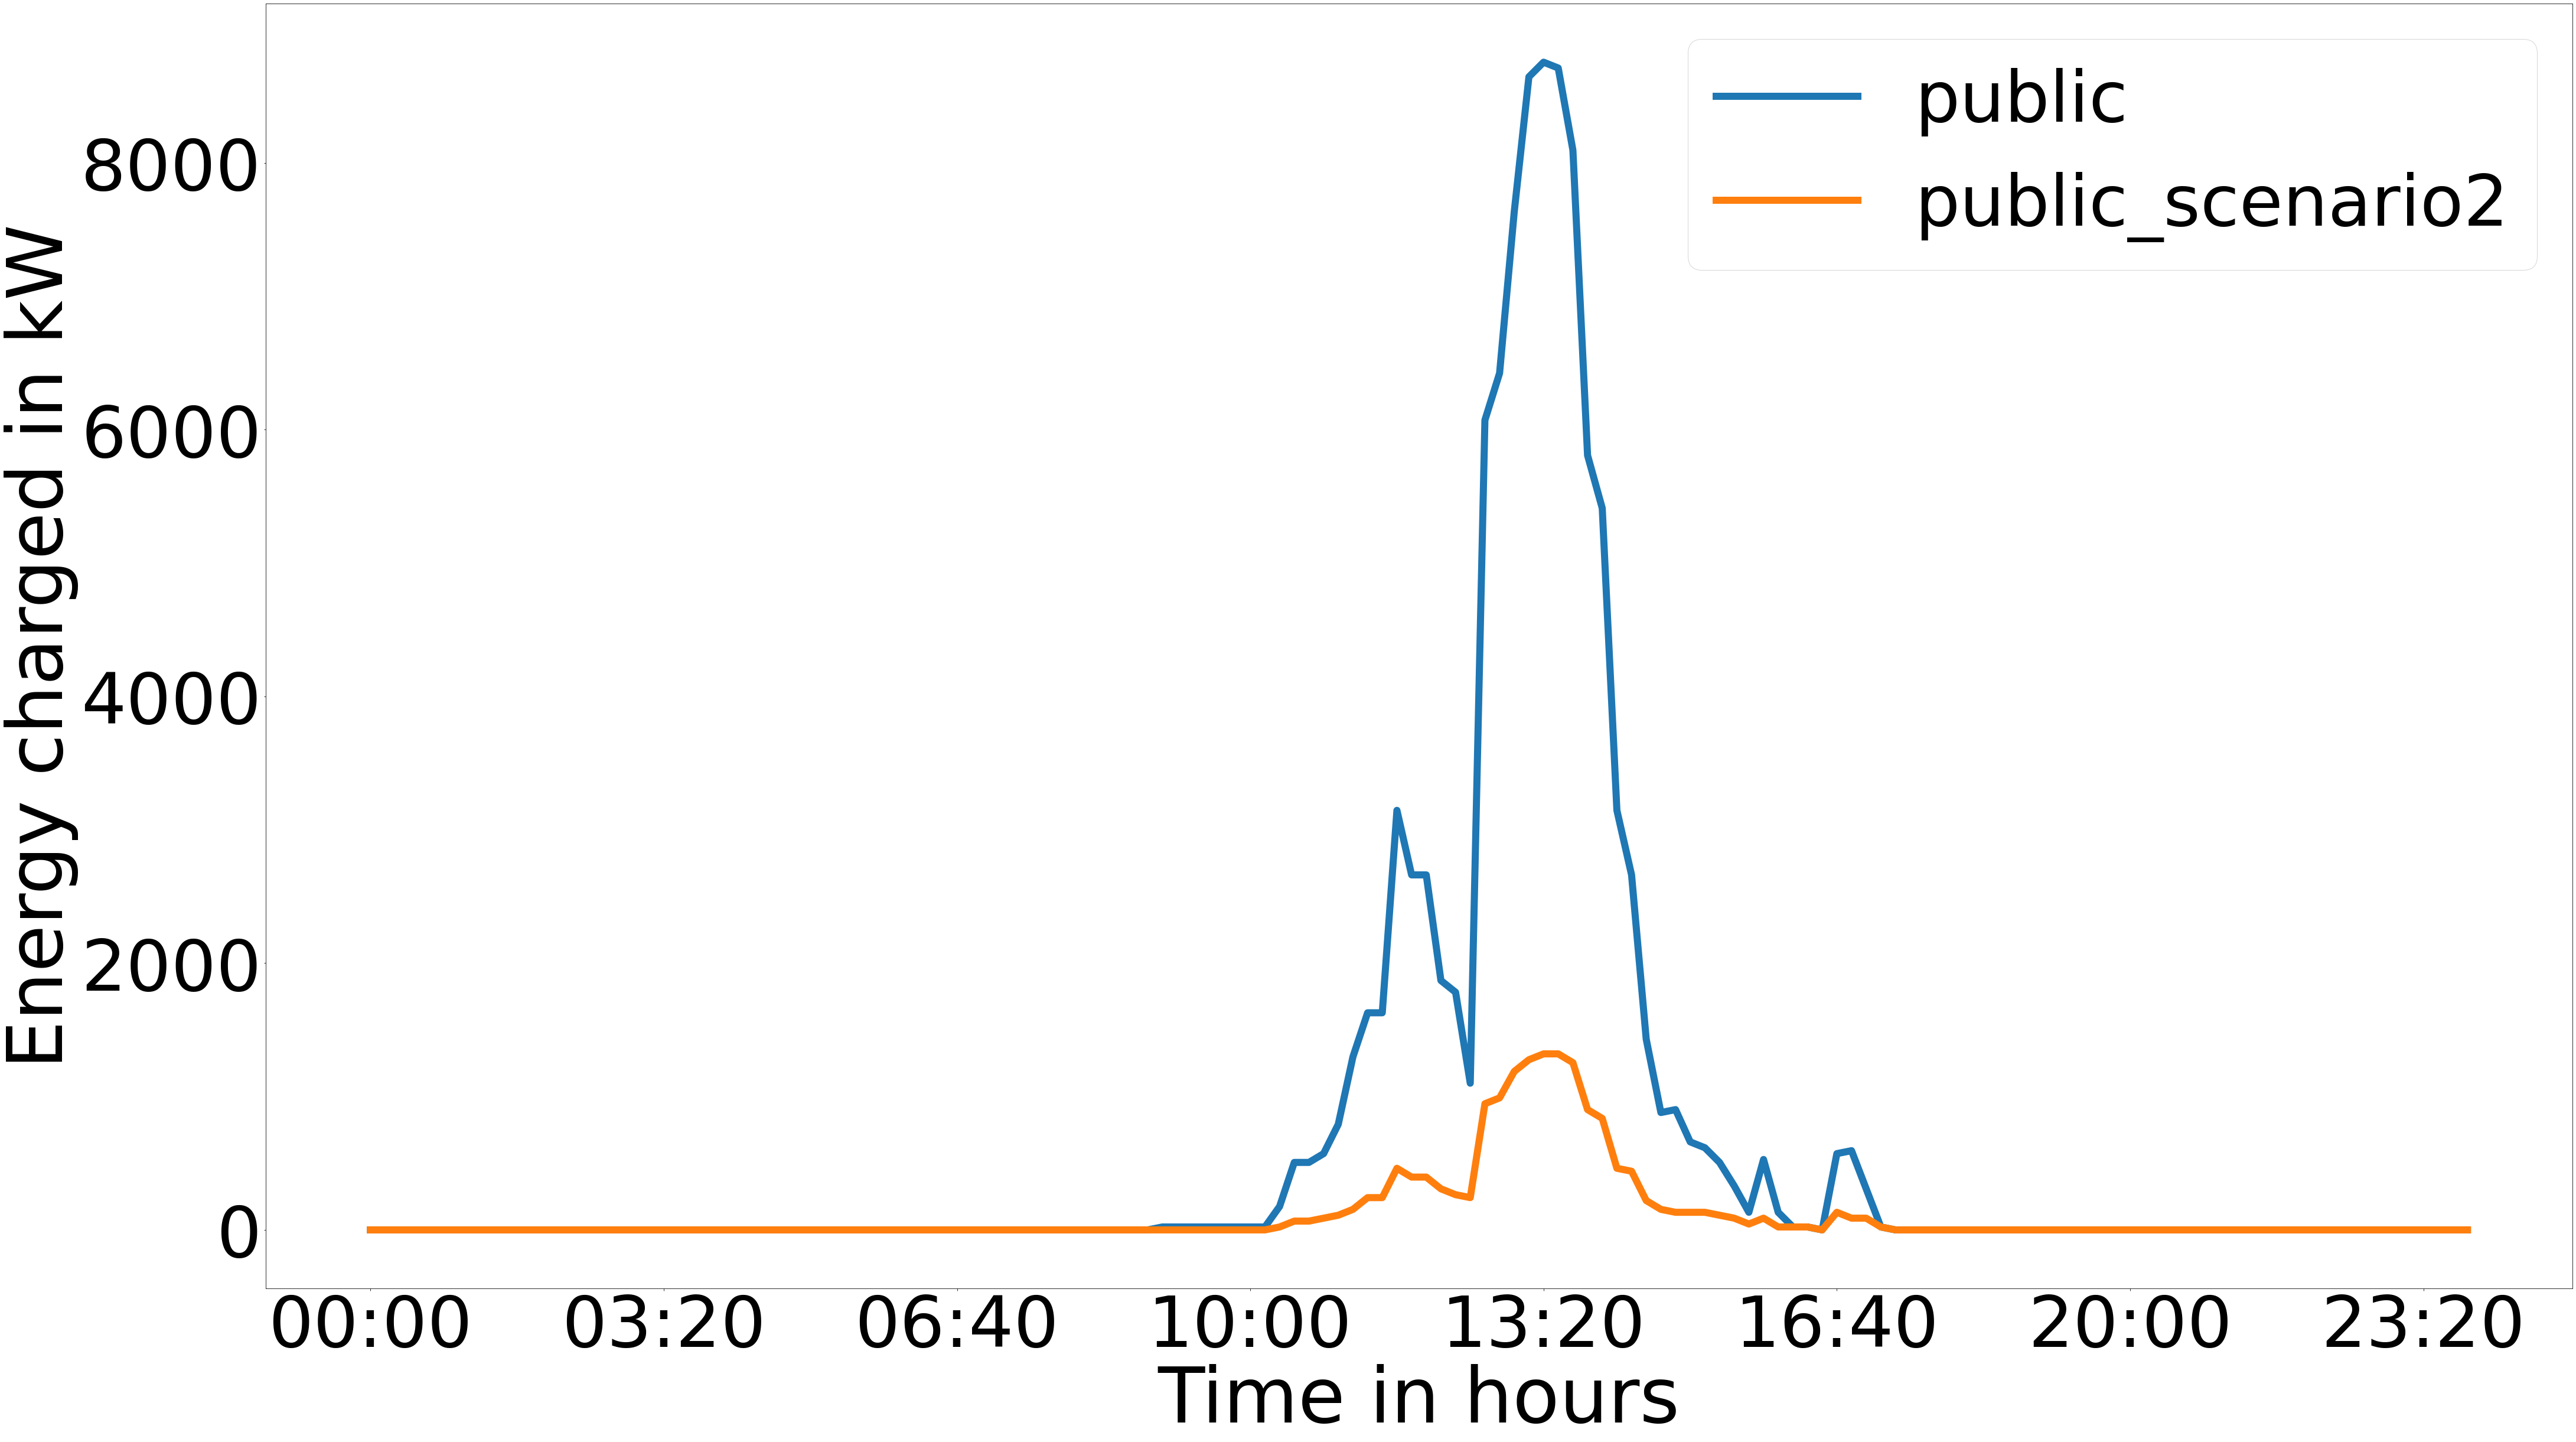

In [32]:
# Plot power profiles of comparison of baseline scenario and scenario 1 public
df_comp3.plot(kind = 'line', lw = 12, figsize=(70,40), fontsize=120, style='o-')
plt.legend(fontsize=120)
plt.xlabel('Time in hours', fontsize=130)
plt.ylabel('Energy charged in kW', fontsize=130)
#plt.axhline(y=86.67, color='r', linestyle='-')
plt.show()